# 

In [1]:
# imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
# import data
data_import = 'clean_shelter_data.csv'
shelter_data_df = pd.read_csv(data_import, dtype={'Council District': 'string', 'Intake Total': 'string', 'Outcome Subtype': 'string'}, encoding='utf-8')

# Top 10 animal breeds euthanized

In [2]:
# find all euth with substype outcomes
euth_df = shelter_data_df.loc[shelter_data_df['Outcome Type']=='EUTHANIZED']
sub_euth = euth_df.dropna(subset = ['Outcome Subtype'])
# find that Dallas only started using subtypes for euthanization in 2018
euth_count = sub_euth['Year'].value_counts()
sub_euth_type = sub_euth.groupby('Outcome Subtype')['Animal Type'].agg(['count'])
sub_euth_breed = sub_euth.groupby('Animal Breed')['Outcome Subtype'].agg(['count'])
sub_euth_breed = sub_euth_breed.sort_values(by = 'count', ascending=False).head(10)
sub_euth_breed

,count
Animal Breed,
PIT BULL,4094
DOMESTIC SH,3615
GERM SHEPHERD,1226
LABRADOR RETR,1098
OPOSSUM,652
RACCOON,645
CHIHUAHUA SH,467
DOMESTIC MH,270
ROTTWEILER,220


# top 5 cat breeds euthanized

In [3]:
cat_euth = euth_df.loc[euth_df['Animal Type'] == 'CAT']
cat_euth['Animal Breed'].value_counts().head()

DOMESTIC SH    8037
DOMESTIC MH     555
DOMESTIC LH     162
AMER SH         117
SIAMESE          98
Name: Animal Breed, dtype: int64

# top 5 dog breeds euthanized

In [4]:
dog_euth = euth_df.loc[euth_df['Animal Type'] == 'DOG']
dog_euth['Animal Breed'].value_counts().head()

PIT BULL          8589
LABRADOR RETR     2983
GERM SHEPHERD     2946
CHIHUAHUA SH      1420
AMERICAN STAFF     719
Name: Animal Breed, dtype: int64

# Euthanizations per year 

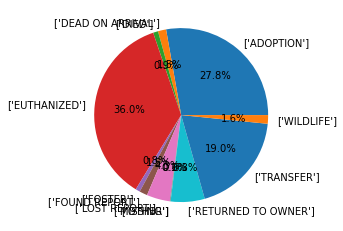

In [5]:
data_2016 = shelter_data_df.loc[shelter_data_df['Year']=='FY2016']
data_2017 = shelter_data_df.loc[shelter_data_df['Year']=='FY2017']
data_2018 = shelter_data_df.loc[shelter_data_df['Year']=='FY2018']
data_2019 = shelter_data_df.loc[shelter_data_df['Year']=='FY2019']
data_2020 = shelter_data_df.loc[shelter_data_df['Year']=='FY2020']
data_2021 = shelter_data_df.loc[shelter_data_df['Year']=='FY2021']
def euth_v_adopt(year):
  #   count = sort_values(year['Outcome Type'].value_counts()
    both = year.groupby('Outcome Type')['Outcome Type'].agg(['count','unique'])
    count = both['count']
    names = both['unique']
    # both.sort_values(by = 'count', ascending = False)
    plt.pie(count, labels = names, autopct='%1.1f%%')
year = data_2016
euth_v_adopt(year)


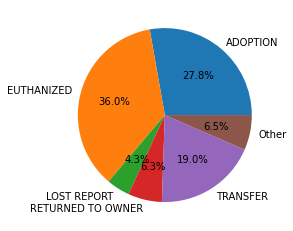

In [6]:
test = data_2016.groupby('Outcome Type')['Outcome Type'].agg(['count'])
names = sorted(data_2017['Outcome Type'].unique())
test['Names'] = names
test2 = test.loc[test['count'] < 1000]
test4 = test.loc[test['count'] > 1000]
test3 = test2['count'].sum()
new_row = {'count':test3, 'Names': 'Other'}
# test = test.append(new_row, ignore_index=True)
#plt.pie(test['count'],labels = test['Names'])
#plt.show()
# plt.pie(test['count'],labels = r_names)
test4 = test4.append(new_row,ignore_index=True)
r_names = test4['Names']
plt.pie(test4['count'], labels = r_names,autopct='%1.1f%%')
plt.show()

In [44]:
def Outcomes(year):
    data = pd.DataFrame(year.groupby('Outcome Type')['Outcome Type'].agg(['count']))
    greater = data.loc[data['count'] >= 1000]
    lesser = data.loc[data['count'] <= 1000]
    greater['Index'] = greater.index
    other_count = lesser.sum()
    other_row = pd.DataFrame({'count':other_count,'Index': 'Other'})
    final = greater.append(other_row,ignore_index=True)
    print(final)
    # print(final)
    # new_row = ('count')
    # final = greater.append(new_row)
    # new_row = {'count':test3, 'Names': 'Other'}
    # test4 = test4.append(new_row,ignore_index=True)
year = data_2016
Outcomes(year)

   count              Index
0   8358           ADOPTION
1  10846         EUTHANIZED
2   1301        LOST REPORT
3   1899  RETURNED TO OWNER
4   5726           TRANSFER
5   1959              Other


C:\Users\slaye\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Percent euthanized vs. adopted